In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=10)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=10)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="/Users/ian/Desktop/Study/data/iris/iris_tree.dot",
    feature_names=["petal length", "petal width"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

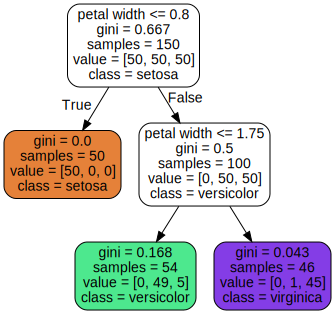

In [3]:
import graphviz

with open("/Users/ian/Desktop/Study/data/iris/iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename="iris_tree", directory="/Users/ian/Desktop/Study/data/iris")
dot

In [ ]:
# 의사결정나무모형의 결정 경계 그래프

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0,7.5,0,3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length", fontsize=12)
        plt.ylabel("petal width", fontsize=12)
    else:
        plt.xlabel(r"$x_1$", fontsize=15)
        plt.ylabel(r"$x_2$", fontsize=15, rotation=0)
    if legend:
        plt.legend(loc="lower right")

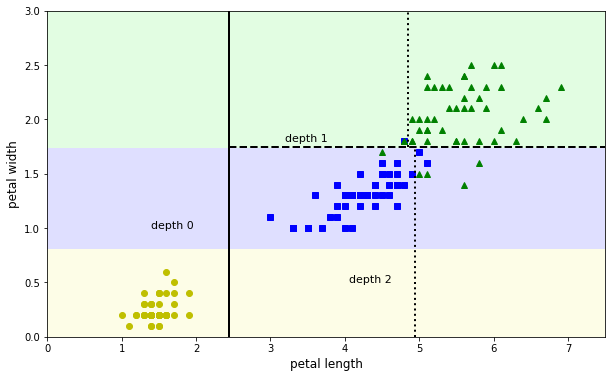

In [16]:
plt.figure(figsize=(10,6))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "depth 0", fontsize=11)
plt.text(3.2, 1.80, "depth 1", fontsize=11)
plt.text(4.05, 0.5, "depth 2", fontsize=11)
plt.show()

In [17]:
# 분류 라벨의 확률 추정

result = tree_clf.predict_proba([[5, 1.5]])
print(result)
print(np.argmax(result))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
1
[1]


In [18]:
# 이상치에 취약한 의사결정나무 ㅠㅠ

In [19]:
X[(X[:, 1]==X[:, 1][y==1].max())&(y==1)]

array([[4.8, 1.8]])

In [20]:
not_widest_versicolor = (X[:,1]!=1.8)|(y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=10)
tree_clf_tweaked.fit(X_tweaked,y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=10)

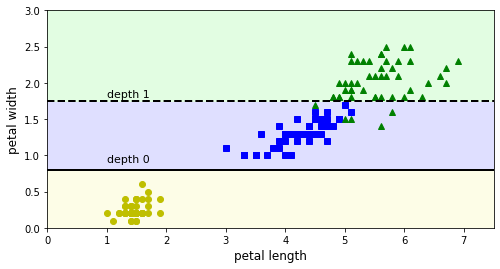

In [21]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "depth 0", fontsize=11)
plt.text(1.0, 1.80, "depth 1", fontsize=11)
plt.show()

In [22]:
# 과적합을 방지하기 위한 방법 : 규제

In [23]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=10)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=10)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=10)

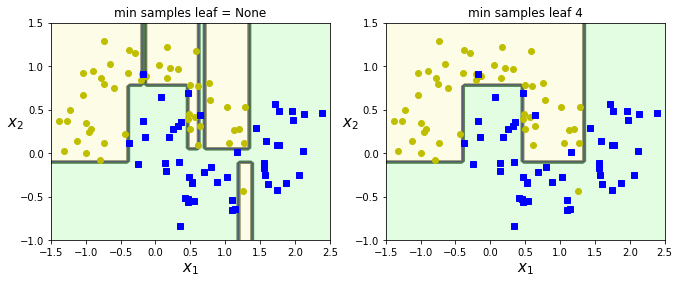

In [24]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min samples leaf = None")
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min samples leaf {}".format(deep_tree_clf2.min_samples_leaf))
plt.show()

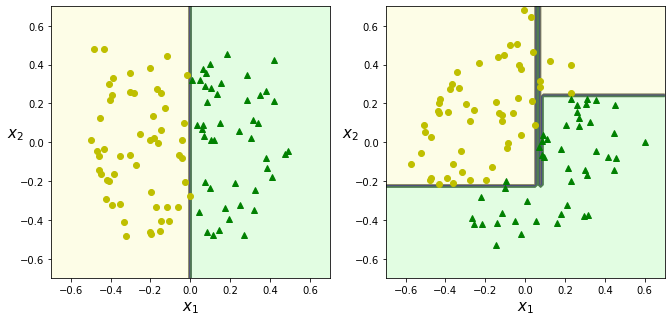

In [26]:
np.random.seed(10)
Xs = np.random.rand(100,2)-0.5
ys = (Xs[:,0]>0).astype(np.float32)*2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=10)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=10)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11,5))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.show()

In [ ]:
# 회귀 트리 모형

In [1]:
import numpy as np

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4*(X-0.5)**2
y = y + np.random.randn(m, 1) / 10

In [2]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=10)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=10)

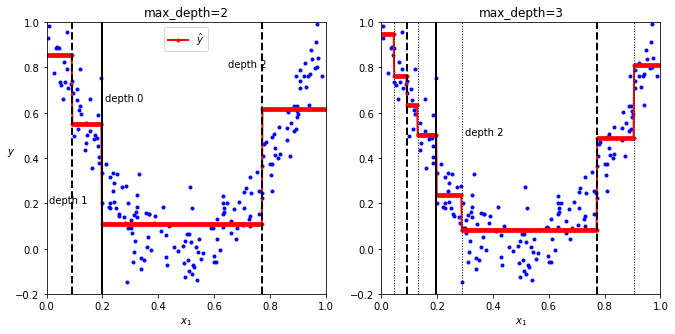

In [4]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

tree_reg1 = DecisionTreeRegressor(random_state=10, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=10, max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel(ylabel, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11,5))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "depth 0")
plt.text(0.01, 0.2, "depth 1")
plt.text(0.65, 0.8, "depth 2")
plt.legend(loc="upper center")
plt.title("max_depth=2")

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "depth 2")
plt.title("max_depth=3")

plt.show()

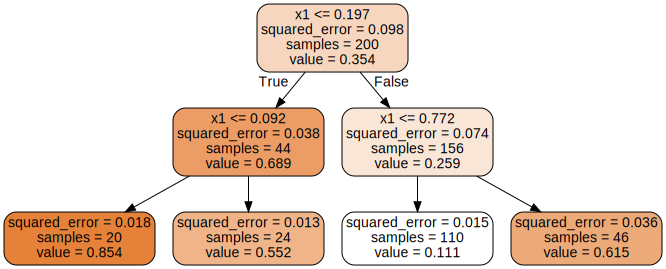

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg1,
    out_file="/Users/ian/Desktop/Study/data/tree/regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)

import graphviz
with open("/Users/ian/Desktop/Study/data/tree/regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = "png"
dot.render(filename="regression_tree", directory="/Users/ian/Desktop/Study/data/tree", cleanup=True)
dot

In [ ]:
# 앙상블 모형

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(random_state=42)

# 직접투표방식 : 개별 분류기 중에 가장 많은 투표수를 얻은 클래스를 선택
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(random_state=42))])

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.896
VotingClassifier 0.904


In [4]:
for i in range(0,100,10):
    print('logit: ',log_clf.predict(X_test[i].reshape(-1,2)),end=',')
    print('rf: ',rnd_clf.predict(X_test[i].reshape(-1,2)),end=',')
    print('svm: ',svm_clf.predict(X_test[i].reshape(-1,2)),end=',')
    print('투표결과: ',voting_clf.predict(X_test[i].reshape(-1,2)))

logit:  [1],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [0],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [1],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [0],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [0],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [0],rf:  [1],svm:  [0],투표결과:  [0]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]


In [5]:
# 간접투표방식 : 개별 분류기의 평균적인 확ㄹ류 추정값을 계산하여 가장 높은 확률을 가진 클래스 선택

from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.896
VotingClassifier 0.904


In [6]:
for i in range(0,100,10):
    print('logit: ',log_clf.predict(X_test[i].reshape(-1,2)),end=',')
    print('rf: ',rnd_clf.predict(X_test[i].reshape(-1,2)),end=',')
    print('svm: ',svm_clf.predict(X_test[i].reshape(-1,2)),end=',')
    print('투표결과: ',voting_clf.predict(X_test[i].reshape(-1,2)))

logit:  [1],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [0],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [1],rf:  [0],svm:  [0],투표결과:  [1]
logit:  [0],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [0],rf:  [0],svm:  [0],투표결과:  [0]
logit:  [0],rf:  [1],svm:  [0],투표결과:  [0]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]
logit:  [1],rf:  [1],svm:  [1],투표결과:  [1]


In [ ]:
# 배깅Bagging : 중복값을 허용하여 샘플링
# 페이스팅Pasting : 중복값을 허용하지 않는 샘플링
# n_estimators 분류기 max_samples 샘플수 bootstrap 중복여부

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.3, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.84


In [8]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


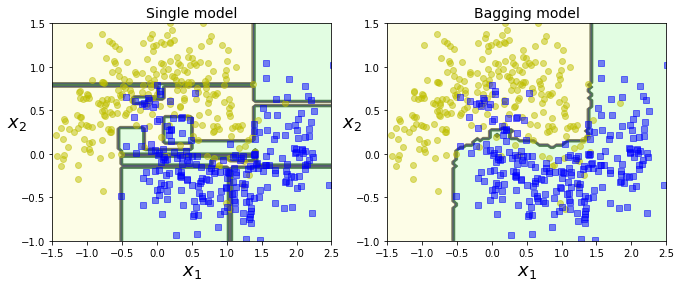

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Single model", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging model", fontsize=14)
plt.show()
#단일모델은 과적합화 된 모형이고 오른쪽의 배깅모형은 일반화된 모형   

In [10]:
# 배깅분류기를 이용하여 만든 랜덤포레스트

from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16,
random_state=42), n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1,
random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.84

In [12]:
# 트리모델에는 특성중요도를 알려주는 기능이 있으니 그걸 통해서 어떤 독립변수가 가장 영향력이 큰지 확인해보자

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [13]:
# oob 평가

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [14]:
# oob 샘플에 대한 판별함수 출력값

bag_clf.oob_decision_function_[:5]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.99468085, 0.00531915],
       [1.        , 0.        ],
       [0.15934066, 0.84065934]])

In [15]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.832

In [16]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

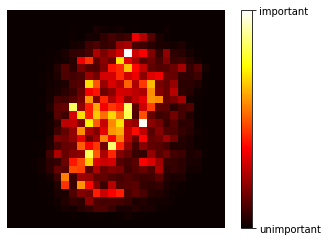

In [17]:
import matplotlib

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"],mnist["target"])

def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.hot, interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['unimportant', 'important'])

plt.show()

In [18]:
# AdaBoost
# 이전 모델이 잘못 분류한 샘플의 가중치를 높이는 방식
# 학습이 부족한 샘플의 가중치를 업데이트하면서 순차적으로 학습
# 정확도가 점차 향상되도록 가중치를 업데이트함

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.832